### Histograms for song features across genres
In this file, we draw histograms for each of the song features, first grouped by features, then by we draw a histogram for each genre for each file. We do this to see if there are any distinct features that can be used to identify a genre.

In [3]:
import pandas as pd
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt

In [4]:
# Read data
DATA_BASE_URL = "https://raw.githubusercontent.com/sql-injection/spotify_data/master/"
datasets = {
    "train": DATA_BASE_URL + "train.csv",
    "test": DATA_BASE_URL + "test.csv",
    "all": DATA_BASE_URL + "spotify.csv"
}

total_df = pd.read_csv(datasets["all"])
train_df = pd.read_csv(datasets["train"])
test_df = pd.read_csv(datasets["test"])
attribute_names = list(train_df)[:-1]

# Split test and training into x and y values
x_train = train_df[attribute_names]
y_train = train_df["Class"]
x_test = test_df[attribute_names]
y_test = test_df["Class"]

x = x_train
y = y_train
x = x.values
y = y.values

In [5]:
genre_histograms = {
    "edm":       np.asarray([1, 0, 0, 0, 0, 0, 0]),
    "hiphop":    np.asarray([0, 1, 0, 0, 0, 0, 0]),
    "classical": np.asarray([0, 0, 1, 0, 0, 0, 0]),
    "jazz":      np.asarray([0, 0, 0, 1, 0, 0, 0]),
    "pop":       np.asarray([0, 0, 0, 0, 1, 0, 0]),
    "country":   np.asarray([0, 0, 0, 0, 0, 1, 0]),
    "rock":      np.asarray([0, 0, 0, 0, 0, 0, 1])
}

In [6]:
# Genre encoded into one-hot vectors
y_encoded = np.array([genre_histograms[genre] for genre in y])

In [7]:
def draw_feature_histograms():  
    classes_data = []
    classes = list(genre_histograms.keys())
    num_classes = len(classes)
    
    # secure data for each class
    for index in range(num_classes):
        ind = np.argwhere(y_encoded[:, index] == 1) # look up that one classification
        ind = np.concatenate(ind).ravel() # flatten the list
        
        class_data = x[ind]
        classes_data.append(class_data)
            
    plt.figure(figsize=(15, 15))
    
    # go through each feature
    for feature_index in range(1, len(attribute_names)):
        ax = plt.subplot(3, 4, feature_index)
        # for each class
        for index in range(num_classes):
            ax.hist(classes_data[index][:, feature_index], bins="auto", alpha=0.5)
            
        ax.set_title(attribute_names[feature_index])
    plt.legend(classes, bbox_to_anchor=(1.05, 0), loc='lower left',)
    plt.show()

In [11]:
def draw_feature_histograms_by_class():    
    classes_data = []
    classes = list(genre_histograms.keys())
    num_classes = len(classes)
    
    colors = ["lightskyblue", "orange", "lightgreen", "salmon", "plum", "darksalmon", "lightpink"]
    
    # secure data for each class
    for index in range(num_classes):
        ind = np.argwhere(y_encoded[:, index] == 1) # look up that one classification
        ind = np.concatenate(ind).ravel() # flatten the list
        
        class_data = x[ind]
        classes_data.append(class_data)
        
        
    for index in range(0, num_classes):
        plt.figure(figsize=(15, 15))
        
        print("Feature Distributions for {genre}".format(genre=classes[index]))
        for attribute_index in range(1, len(attribute_names)):
            ax = plt.subplot(4, 4, attribute_index)
            ax.hist(classes_data[index][:, attribute_index], bins="auto", color=colors[index % 7])
            title = classes[index] + ": " + attribute_names[attribute_index]
            ax.set_title(title)
            
        plt.show()

Below, we show the song feature distributions across all genres. 

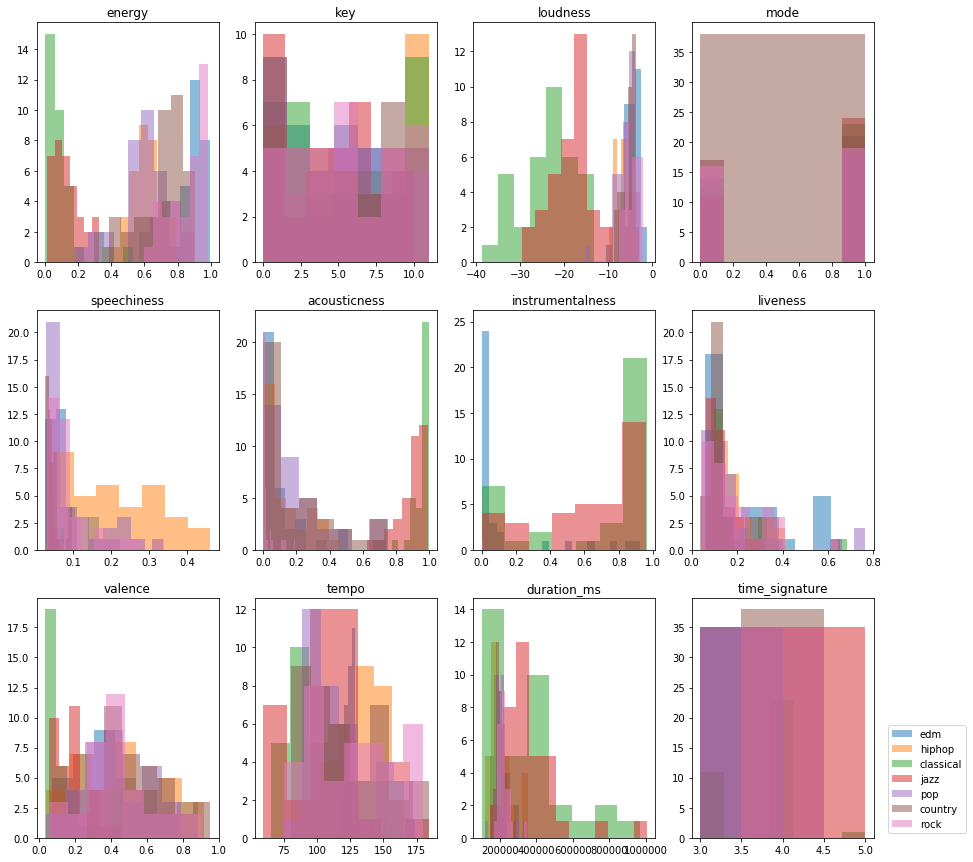

In [40]:
draw_feature_histograms()

Below, we show the feature histogram for each genre.

Feature Distributions for edm


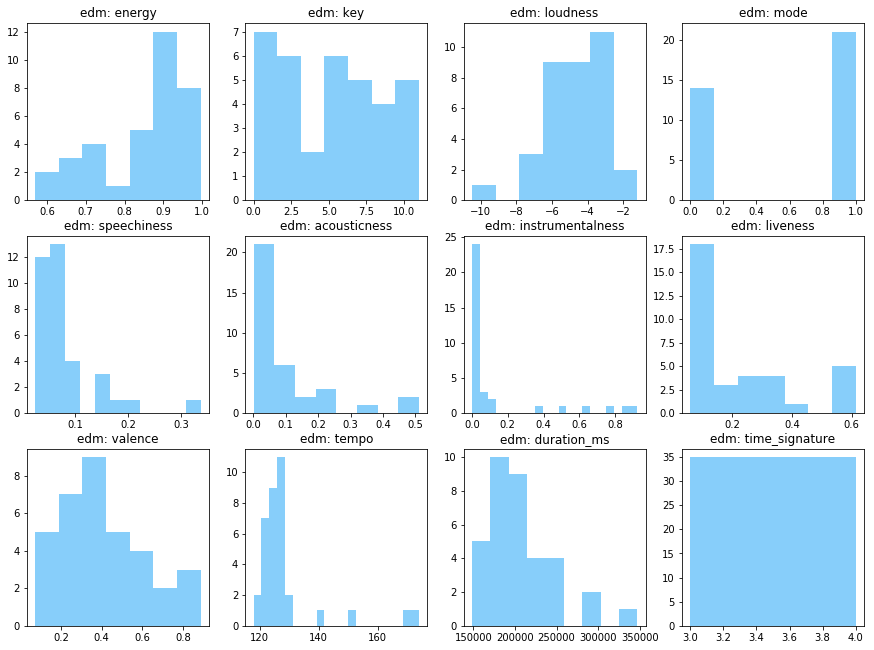

Feature Distributions for hiphop


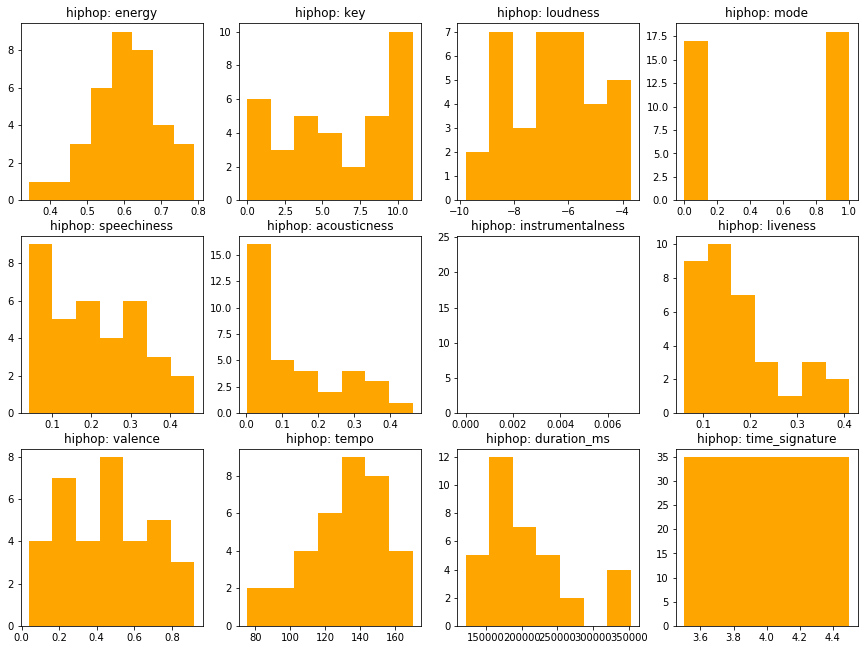

Feature Distributions for classical


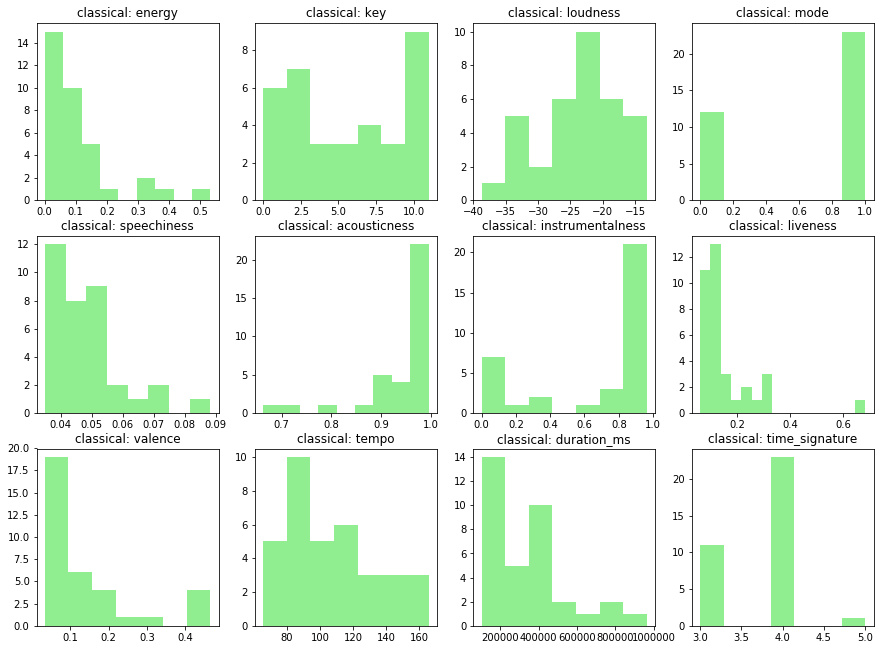

Feature Distributions for jazz


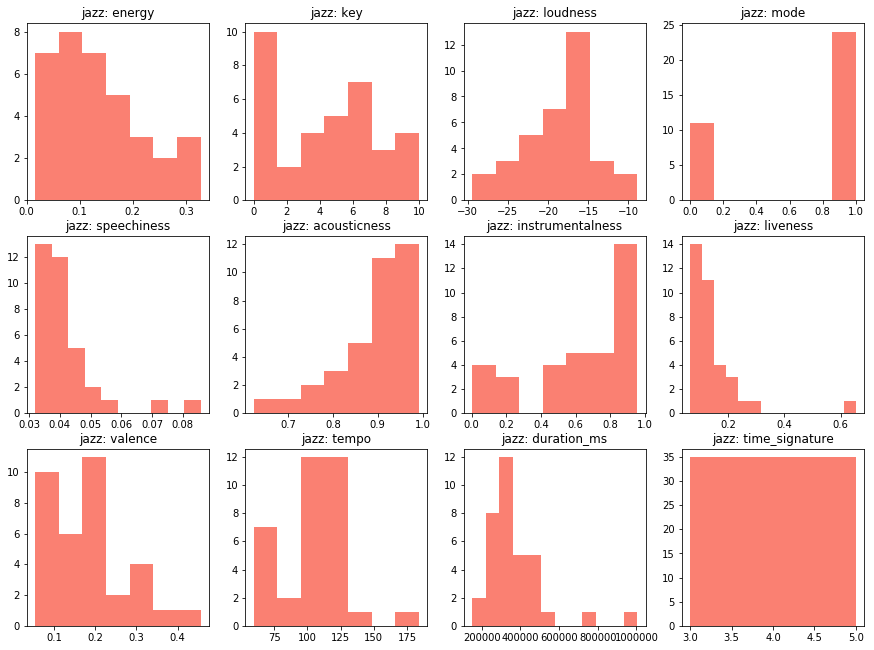

Feature Distributions for pop


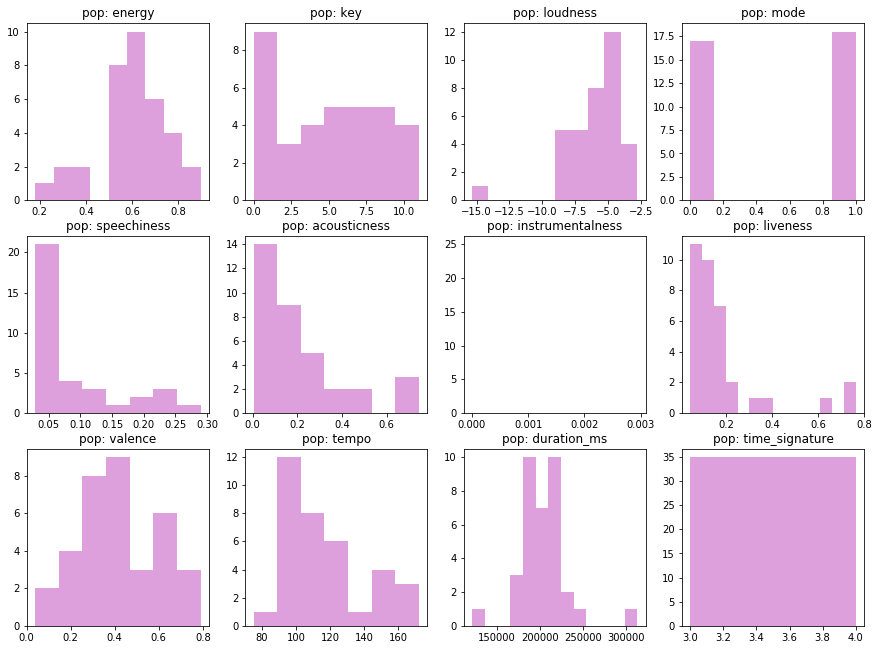

Feature Distributions for country


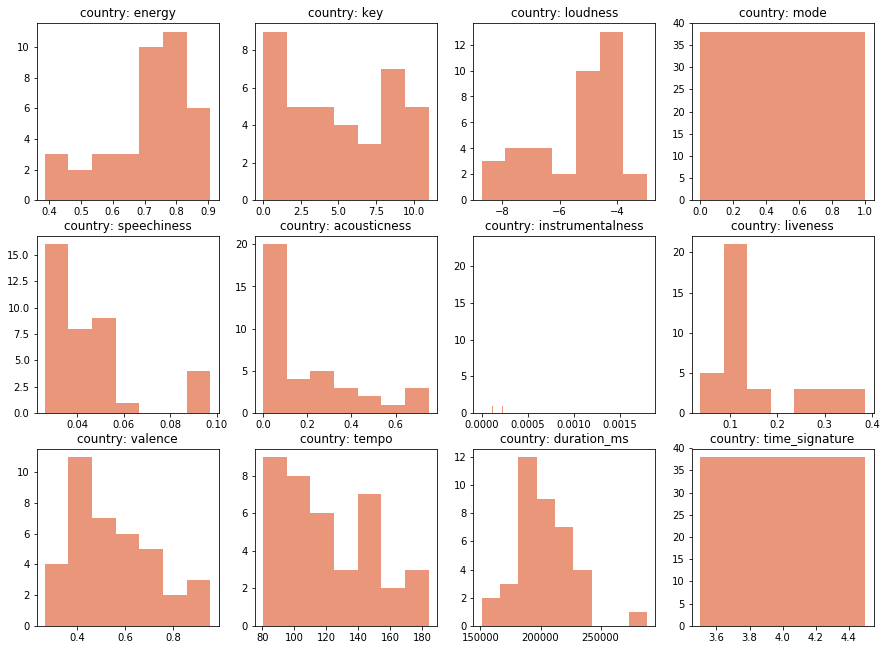

Feature Distributions for rock


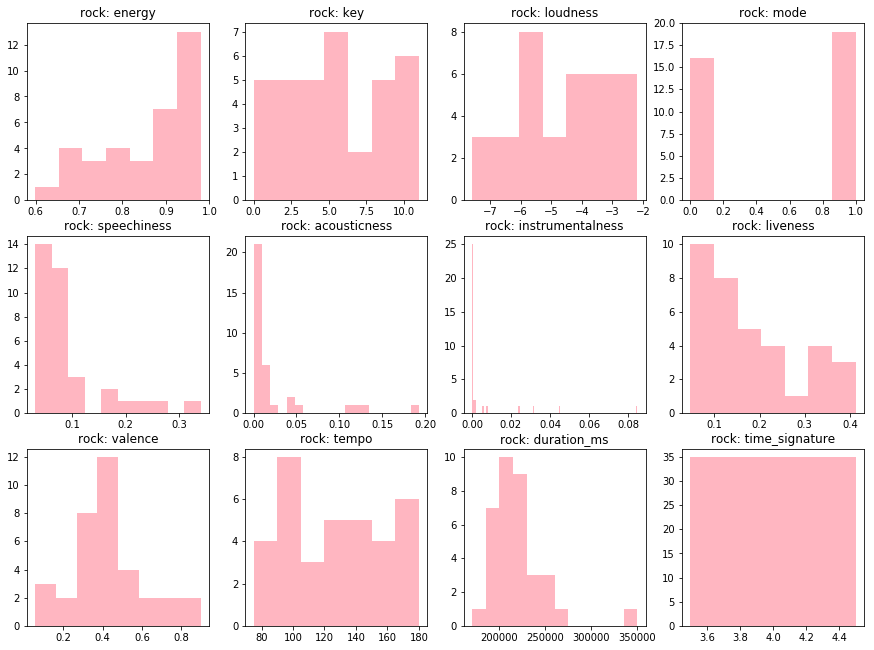

In [12]:
draw_feature_histograms_by_class()

From our histograms, we noticed some patterns for each of the genres:  
EDM:
- high energy
- generally low speechiness
- generally acousticness
- generally low instrumentalness

HIPHOP: 
- medium energy
- low acousticness
- generally low liveness

CLASSICAL:
- generally low energy
- real low speechiness
- generally low acousticness

JAZZ
- low energy
- real low speechiness
- high acousticness
- generally low valence

POP - most distribution
- varied energy
- generally low speechiness (kind of surprising?)
- generally low acousticness (but kind of spread out)
- generally low liveness (but kind of spread out)

COUNTRY
- medium to high energy
- real low speechiness
- generally low to med acousticness (wait what?)


ROCK
- high energy
- generally low speechiness
- low acousticness
- generally low liveness